In [1]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
import os
import numpy as np
import pyspark.sql.functions as f
import subprocess
from pyspark.sql.functions import min, max, col
from pyspark.sql.functions import *

In [2]:
sc = SparkContext()
sqlcontext = SQLContext(sc)

In [3]:
dir_in = "/user/hadoop/data/population_raw/local_dong"
args = "hdfs dfs -ls "+dir_in+" | awk '{print $8}'"
proc = subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

s_output, s_err = proc.communicate()
all_dart_dirs = s_output.decode('utf-8').split()
print(all_dart_dirs)

['/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201701.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201702.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201703.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201704.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201705.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201706.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201707.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201708.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201709.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201710.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201711.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201712.csv', '/user/hadoop/data/population_raw/local_dong/LOCAL_PEOPLE_DONG_201801.csv', '/user/hado

In [4]:
df = sqlcontext.read.format("com.databricks.spark.csv")\
    .option("header", "true").option("inferSchema", "true").load(all_dart_dirs)

In [21]:
print(df.count())
df.show()

8456256
+--------+-----+--------+----------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+------------+
|   기준일ID|시간대구분|   행정동코드|    총생활인구수|남자0세부터9세생활인구수|남자10세부터14세생활인구수|남자15세부터19세생활인구수|남자20세부터24세생활인구수|남자25세부터29세생활인구수|남자30세부터34세생활인구수|남자35세부터39세생활인구수|남자40세부터44세생활인구수|남자45세부터49세생활인구수|남자50세부터54세생활인구수|남자55세부터59세생활인구수|남자60세부터64세생활인구수|남자65세부터69세생활인구수|남자70세이상생활인구수|여자0세부터9세생활인구수|여자10세부터14세생활인구수|여자15세부터19세생활인구수|여자20세부터24세생활인구수|여자25세부터29세생활인구수|여자30세부터34세생활인구수|여자35세부터39세생활인구수|여자40세부터44세생활인구수|여자45세부터49세생활인구수|여자50세부터54세생활인구수|여자55세부터59세생활인구수|여자60세부터64세생활인구수|여자65세부터69세생활인구수|여자70세이상생활인구수|
+--------+-----+--------+----------+------

In [25]:
dir_in1 = "/user/hadoop/data/population_raw/long_dong"
args1 = "hdfs dfs -ls "+dir_in1+" | awk '{print $8}'"
proc1 = subprocess.Popen(args1, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

s_output1, s_err1 = proc1.communicate()
all_dart_dirs1 = s_output1.decode('utf-8').split()
print(all_dart_dirs1)

['/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201701.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201702.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201703.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201704.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201705.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201706.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201707.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201708.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201709.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201710.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201711.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201712.csv', '/user/hadoop/data/population_raw/long_dong/LONG_FOREIGNER_DONG_201801.csv'

In [27]:
df1 = sqlcontext.read.format("com.databricks.spark.csv")\
    .option("header", "true").option("inferSchema", "true").load(all_dart_dirs1)

In [28]:
print(df1.count())
df1.show()

8452993
+--------+-----+--------+---------+---------+-----------+
|   기준일ID|시간대구분|   행정동코드|   총생활인구수| 중국인체류인구수|중국외외국인체류인구수|
+--------+-----+--------+---------+---------+-----------+
|20180101|    0|11110515| 238.4334|  71.5804|   166.8531|
|20180101|    0|11110530| 965.3822| 256.3561|   709.0263|
|20180101|    0|11110540| 258.3605|  89.5374|   168.8233|
|20180101|    0|11110550| 396.9853| 255.6719|   141.3133|
|20180101|    0|11110560| 417.0321| 108.3052|   308.7264|
|20180101|    0|11110570| 101.4391|  57.3437|    44.0955|
|20180101|    0|11110580| 226.3816| 144.9757|    81.4059|
|20180101|    0|11110600| 192.0258|   62.448|   129.5775|
|20180101|    0|11110615|3533.2168|1537.6318|  1995.5842|
|20180101|    0|11110630|1287.9499| 608.1324|   679.8181|
|20180101|    0|11110640| 745.5055| 497.9864|   247.5193|
|20180101|    0|11110650|4252.0635|3177.6394|  1074.4238|
|20180101|    0|11110670|2084.8789|1219.7576|   865.1212|
|20180101|    0|11110680|2210.9962|1745.4743|   465.5222|
|20180

In [35]:
dir_in2 = "/user/hadoop/data/population_raw/temp_dong"
args2 = "hdfs dfs -ls "+dir_in2+" | awk '{print $8}'"
proc2 = subprocess.Popen(args2, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)

s_output2, s_err2 = proc2.communicate()
all_dart_dirs2 = s_output2.decode('utf-8').split()
print(all_dart_dirs2)

['/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201701.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201702.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201703.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201704.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201705.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201706.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201707.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201708.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201709.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201710.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201711.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201712.csv', '/user/hadoop/data/population_raw/temp_dong/TEMP_FOREIGNER_DONG_201801.csv'

In [36]:
df2 = sqlcontext.read.format("com.databricks.spark.csv")\
    .option("header", "true").option("inferSchema", "true").load(all_dart_dirs2)

In [37]:
print(df2.count())
df2.show()

8357249
+--------+-----+--------+----------+----------+-----------+
|   기준일ID|시간대구분|   행정동코드|    총생활인구수|  중국인체류인구수|중국외외국인체류인구수|
+--------+-----+--------+----------+----------+-----------+
|20170801|   00|11110515|  274.4061|  106.1297|   168.2777|
|20170801|   00|11110530|  816.0056|    193.74|   622.2671|
|20170801|   00|11110540|  332.7042|   70.8846|   261.8202|
|20170801|   00|11110550|  130.4223|   24.2384|   106.1844|
|20170801|   00|11110560|  208.2907|       0.0|   208.2913|
|20170801|   00|11110570|   13.1036|       0.0|    13.1036|
|20170801|   00|11110580|  121.9498|   28.5198|      93.43|
|20170801|   00|11110600|  205.9276|   82.1847|   123.7435|
|20170801|   00|11110615| 4972.5054|  982.8028|   3989.706|
|20170801|   00|11110630|  995.0915|  321.9132|   673.1791|
|20170801|   00|11110640|  224.0783|  102.0232|   122.0553|
|20170801|   00|11110650|  447.2832|  123.4079|   323.8769|
|20170801|   00|11110670| 1095.8838|  439.9249|   655.9605|
|20170801|   00|11110680|  248.5

In [67]:
_df2=df2.filter((col("시간대구분") >= 2) & (col("시간대구분") <= 6))

In [70]:
_df2.show()
print(_df2.count())

+--------+-----+--------+----------+----------+-----------+
|   기준일ID|시간대구분|   행정동코드|    총생활인구수|  중국인체류인구수|중국외외국인체류인구수|
+--------+-----+--------+----------+----------+-----------+
|20170801|   02|11110515|  230.9504|   74.4312|   156.5202|
|20170801|   02|11110530|  798.2872|  165.7337|   632.5548|
|20170801|   02|11110540|  316.0864|   60.9552|   255.1319|
|20170801|   02|11110550|   77.0069|   24.1531|     52.854|
|20170801|   02|11110560|  244.6923|       0.0|   244.6937|
|20170801|   02|11110580|  110.4110|   28.0018|    82.4093|
|20170801|   02|11110600|  202.4196|   82.1423|   120.2782|
|20170801|   02|11110615| 4896.5322| 1111.1994|  3785.3364|
|20170801|   02|11110630|  964.8674|  311.1179|   653.7504|
|20170801|   02|11110640|  149.8106|   53.3071|     96.504|
|20170801|   02|11110650|  372.8585|  122.8191|   250.0403|
|20170801|   02|11110670| 1091.7560|  434.3762|   657.3811|
|20170801|   02|11110680|  348.2017|  239.5484|   108.6537|
|20170801|   02|11110690|   26.3345|   1

In [82]:
__df2 = _df2.groupBy("행정동코드").agg(f.mean('총생활인구수'))
__df2 = __df2.withColumnRenamed("avg(총생활인구수)", "2-6")
#__df2.selectExpr("avg(총생활인구수) as 2-6")
__df2.show()

+--------+------------------+
|   행정동코드|               2-6|
+--------+------------------+
|11410660| 51.14819639429313|
|11530770|  540.652040777202|
|11590520|121.11397145077719|
|11215820|165.75963069948187|
|11110640|262.13254181347145|
|11140605|5108.4001270725375|
|11320690| 59.51459513147616|
|11545510| 839.5344152590674|
|11545670| 156.6526001554404|
|11560550|103.25601686528495|
|11620545| 32.94339757591901|
|11230570| 41.92671373312566|
|11320680| 37.38892334705078|
|11440555|392.94038629533696|
|11470630| 43.13964098105371|
|11350580|54.367567945349435|
|11350710|  24.3518795707688|
|11440720| 449.8771895336787|
|11680521|  2599.62937388601|
|11410585| 2470.688268860103|
+--------+------------------+
only showing top 20 rows



In [85]:
total = __df2.agg(f.sum("2-6")).collect()
print(total)

[Row(sum(2-6)=198666.10114032082)]


TypeError: can only concatenate list (not "int") to list

In [86]:
df2_=df2.filter((col("시간대구분") >= 10) & (col("시간대구분") <= 14))
df2__ = df2_.groupBy("행정동코드").agg(f.mean('총생활인구수'))
df2__ = df2__.withColumnRenamed("avg(총생활인구수)", "10-14")

In [87]:
joined2 = __df2.join(df2__, __df2.행정동코드 == df2__.행정동코드, how='right')

In [88]:
joined2.show()

+--------+------------------+--------+------------------+
|   행정동코드|               2-6|   행정동코드|             10-14|
+--------+------------------+--------+------------------+
|11410660| 51.14819639429313|11410660|61.692074533678785|
|11530770|  540.652040777202|11530770|249.97844142487057|
|11590520|121.11397145077719|11590520| 210.3621320725388|
|11215820|165.75963069948187|11215820|118.47339582793464|
|11110640|262.13254181347145|11110640| 383.3383622797927|
|11140605|5108.4001270725375|11140605| 3096.205856502591|
|11320690| 59.51459513147616|11320690| 60.21827356862745|
|11545510| 839.5344152590674|11545510| 968.1120376943005|
|11545670| 156.6526001554404|11545670|155.62634207253888|
|11560550|103.25601686528495|11560550|124.36207560975613|
|11620545| 32.94339757591901|11620545|26.909841075268815|
|11230570| 41.92671373312566|11230570|54.673806542789826|
|11320680| 37.38892334705078|11320680|  34.2067885457608|
|11440555|392.94038629533696|11440555| 395.4123920984455|
|11470630| 43.

In [91]:
total = joined2.agg(f.sum("2-6")).collect()
print(total)
total2 = joined2.agg(f.sum("10-14")).collect()
print(total2)

[Row(sum(2-6)=198666.10114032082)]
[Row(sum(10-14)=185298.19439158612)]


In [89]:
joined2.rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1]

198666.10114032082

In [90]:
joined2.rdd.map(lambda x: (1,x[3])).reduceByKey(lambda x,y: x + y).collect()[0][1]

185298.19439158612

In [92]:
_df=df.filter((col("시간대구분") >= 2) & (col("시간대구분") <= 6))
__df = _df.groupBy("행정동코드").agg(f.mean('총생활인구수'))
__df = __df.withColumnRenamed("avg(총생활인구수)", "2-6")
df_=df.filter((col("시간대구분") >= 10) & (col("시간대구분") <= 14))
df__ = df_.groupBy("행정동코드").agg(f.mean('총생활인구수'))
df__ = df__.withColumnRenamed("avg(총생활인구수)", "10-14")
joined = __df.join(df__, __df.행정동코드 == df__.행정동코드, how='right')
joined.rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1]
joined.rdd.map(lambda x: (1,x[3])).reduceByKey(lambda x,y: x + y).collect()[0][1]

11149327.174549459

In [111]:
joined =  __df.join(df__, ["행정동코드"])
joined.show()

+--------+------------------+------------------+
|   행정동코드|               2-6|             10-14|
+--------+------------------+------------------+
|11440710|20365.234847316482|16223.886127148015|
|11530510|34055.502021853186|33991.773300818284|
|11305630|27127.469100312872|28427.690106281585|
|11215840|24339.137178170873|22620.401528953073|
|11110680|10673.320696365825| 8939.117836558364|
|11305606|19331.100754584833|13524.485296486158|
|11200520|14064.368803032488| 9665.649934223826|
|11590620|28185.191364765335| 24300.56854604091|
|11680700|48072.257263489766|36860.178391624555|
|11140550|12014.007605270755| 84084.10366454872|
|11380530| 27045.24168630566| 20114.18668238267|
|11530550|18511.409822623347|15621.102345150422|
|11530560|  34592.4629323225| 41075.05364079422|
|11620775| 23660.85507022864|16851.503311841152|
|11740530| 27553.49757121541|  26502.7172122503|
|11200790|19550.109761636588|  22961.8473189651|
|11350695| 38837.16987200963| 43633.99753078219|
|11650510|27570.4431

In [93]:
print(joined.rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1])
print(joined.rdd.map(lambda x: (1,x[3])).reduceByKey(lambda x,y: x + y).collect()[0][1])

10652948.804489175
11149327.174549459


In [99]:
joined.show()

+--------+------------------+--------+------------------+
|   행정동코드|               2-6|   행정동코드|             10-14|
+--------+------------------+--------+------------------+
|11440710|20365.234847316482|11440710|16223.886127148015|
|11530510|34055.502021853186|11530510|33991.773300818284|
|11305630|27127.469100312872|11305630|28427.690106281585|
|11215840|24339.137178170873|11215840|22620.401528953073|
|11110680|10673.320696365825|11110680| 8939.117836558364|
|11305606|19331.100754584833|11305606|13524.485296486158|
|11200520|14064.368803032488|11200520| 9665.649934223826|
|11590620|28185.191364765335|11590620| 24300.56854604091|
|11680700|48072.257263489766|11680700|36860.178391624555|
|11140550|12014.007605270755|11140550| 84084.10366454872|
|11380530| 27045.24168630566|11380530| 20114.18668238267|
|11530550|18511.409822623347|11530550|15621.102345150422|
|11530560|  34592.4629323225|11530560| 41075.05364079422|
|11620775| 23660.85507022864|11620775|16851.503311841152|
|11740530| 275

In [100]:
joined.count()

424

In [94]:
_df1=df1.filter((col("시간대구분") >= 2) & (col("시간대구분") <= 6))
__df1 = _df1.groupBy("행정동코드").agg(f.mean('총생활인구수'))
__df1 = __df1.withColumnRenamed("avg(총생활인구수)", "2-6")
df1_=df1.filter((col("시간대구분") >= 10) & (col("시간대구분") <= 14))
df1__ = df1_.groupBy("행정동코드").agg(f.mean('총생활인구수'))
df1__ = df1__.withColumnRenamed("avg(총생활인구수)", "10-14")
joined1 = __df1.join(df1__, __df1.행정동코드 == df1__.행정동코드, how='right')
joined1.rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1]
joined1.rdd.map(lambda x: (1,x[3])).reduceByKey(lambda x,y: x + y).collect()[0][1]

816070.4454107131

In [95]:
print(joined1.rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1])
print(joined1.rdd.map(lambda x: (1,x[3])).reduceByKey(lambda x,y: x + y).collect()[0][1])

816736.1427819988
816070.4454107131


No handles with labels found to put in legend.


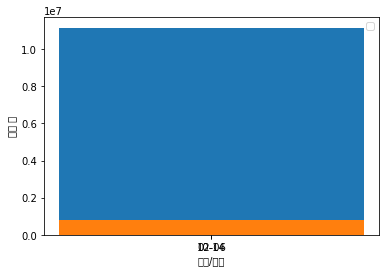

In [98]:
_list = [10652948.804489175, 11149327.174549459]
__list = [816736.1427819988, 816070.4454107131]
_x = ['02-06','10-14']
import matplotlib.pyplot as plt

plt.figure()
plt.bar(2,_list,tick_label = _x , align = 'center')
plt.bar(2,__list,tick_label = _x , align = 'center')

plt.xlabel('내국/외국')
plt.ylabel('인구 수')
plt.legend()

plt.show()

In [109]:
joined.write.csv("0614korean")

In [110]:
sc.textFile("hdfs://master:9000/user/hadoop/0614korean/part*").coalesce(1).saveAsTextFile("hdfs://master:9000/user/hadoop/0614korean_")